In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
def preprocessing(nmp_df,power_df):
    nmp_df.head(10)
    power_df.head(10)
    fix_df=pd.merge(nmp_df, power_df, on=['Datetime'], how='left')
    fix_df.head(10)
    fix_df.describe()
#     fix_df.info()
#     fix_df.drop('Datetime', axis=1, inplace=True)
    
#     fix_df=scaler.transform(fix_df)
    return fix_df

In [3]:
his_nmp_fd_df = pd.read_csv('.\\data\\FD001\\03 His_NWP_FD.csv')
his_power_fd_df = pd.read_csv('.\\data\\FD001\\02_His_Power_FD.csv')
his_fd_df=preprocessing(his_nmp_fd_df,his_power_fd_df)
his_fd_df.to_csv('his_df.csv',encoding = 'utf-8')

In [4]:
df=pd.read_csv('his_df2.csv',parse_dates=["Datetime"],index_col=[0])
df.head()

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-15 00:00:00,3.3696,290.3172,4.1829,295.0334,4.9253,297.9698,5.6139,300.0360,6.2446,301.5774,6.5423,302.1353,27.59,1003.96,93.20,0.0216
2022-07-15 00:15:00,3.3092,291.4477,4.1100,296.1286,4.8389,299.0546,5.5137,301.1241,6.1388,302.6287,6.4347,303.2702,27.61,1004.37,93.05,0.0218
2022-07-15 00:30:00,3.4671,295.0868,4.2669,299.3285,5.0000,302.0054,5.6718,303.8582,6.2926,305.2307,6.5832,305.7906,27.62,1004.25,92.96,0.4021
2022-07-15 00:45:00,3.6896,296.9123,4.4933,300.7888,5.2253,303.4468,5.9067,305.1430,6.5341,306.5367,6.8241,307.1386,27.62,1003.96,92.82,0.5867
2022-07-15 01:00:00,3.7095,298.4995,4.5220,302.3546,5.2791,304.8942,5.9740,306.6973,6.6113,307.9966,6.9170,308.5434,27.64,1003.68,92.59,0.3889


In [5]:
df.tail()

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-21 22:45:00,4.5521,307.3230,6.1812,312.0492,7.6793,314.6835,8.4867,316.0503,8.6879,316.8657,8.7815,317.1689,27.90,1009.53,87.03,2.3584
2022-07-21 23:00:00,4.5931,308.9910,5.4076,312.4519,6.1518,314.8683,6.7197,316.4472,6.8998,317.2906,6.9864,317.6105,27.92,1010.14,0.00,2.8011
2022-07-21 23:15:00,3.3338,303.4994,4.6673,310.4815,5.9120,314.1776,6.7329,316.0832,6.9197,316.9911,7.0061,317.3137,27.44,1009.89,0.00,3.6597
2022-07-21 23:30:00,3.2299,299.8989,4.5556,308.4045,5.8027,312.7652,6.6115,314.9387,6.7961,315.8942,6.8890,316.2939,27.46,1009.84,0.00,3.4466
2022-07-21 23:45:00,3.4215,297.3140,4.7503,306.2668,6.0103,311.0873,6.7556,313.3806,6.9372,314.3576,7.0216,314.8269,27.46,1009.69,0.00,3.0725


In [6]:
df.shape

(672, 16)

In [7]:
fd_df_train = df[:int(0.6*len(df))]
fd_df_valid = df[:int(0.6*len(df)):int(0.8*len(df))]
fd_df_test =df[int(0.8*len(df)):]

In [8]:
df

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-15 00:00:00,3.3696,290.3172,4.1829,295.0334,4.9253,297.9698,5.6139,300.0360,6.2446,301.5774,6.5423,302.1353,27.59,1003.96,93.20,0.0216
2022-07-15 00:15:00,3.3092,291.4477,4.1100,296.1286,4.8389,299.0546,5.5137,301.1241,6.1388,302.6287,6.4347,303.2702,27.61,1004.37,93.05,0.0218
2022-07-15 00:30:00,3.4671,295.0868,4.2669,299.3285,5.0000,302.0054,5.6718,303.8582,6.2926,305.2307,6.5832,305.7906,27.62,1004.25,92.96,0.4021
2022-07-15 00:45:00,3.6896,296.9123,4.4933,300.7888,5.2253,303.4468,5.9067,305.1430,6.5341,306.5367,6.8241,307.1386,27.62,1003.96,92.82,0.5867
2022-07-15 01:00:00,3.7095,298.4995,4.5220,302.3546,5.2791,304.8942,5.9740,306.6973,6.6113,307.9966,6.9170,308.5434,27.64,1003.68,92.59,0.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21 22:45:00,4.5521,307.3230,6.1812,312.0492,7.6793,314.6835,8.4867,316.0503,8.6879,316.8657,8.7815,317.1689,27.90,1009.53,87.03,2.3584
2022-07-21 23:00:00,4.5931,308.9910,5.4076,312.4519,6.1518,314.8683,6.7197,316.4472,6.8998,317.2906,6.9864,317.6105,27.92,1010.14,0.00,2.8011
2022-07-21 23:15:00,3.3338,303.4994,4.6673,310.4815,5.9120,314.1776,6.7329,316.0832,6.9197,316.9911,7.0061,317.3137,27.44,1009.89,0.00,3.6597


In [9]:
# 
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(df)
df_for_training_scaled = scaler.transform(fd_df_train)
df_for_validing_scaled=scaler.transform(fd_df_valid)
df_for_testing_scaled=scaler.transform(fd_df_test)

In [10]:
# # 
# def createXY(dataset,n_past):
#   dataX = []
#   dataY = []
#   for i in range(n_past, len(dataset)):
#           dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
#           dataY.append(dataset[i,-1])
#   return np.array(dataX),np.array(dataY)
 
 
# train_X,train_y=createXY(df_for_training_scaled,7)
# valid_X,valid_y=createXY(df_for_validing_scaled,7)
# test_X,test_y=createXY(df_for_testing_scaled,7)

In [11]:
# %% 
# Split X and y
def createXY(array, days_used_to_train=7):
    features = list()
    labels = list()

    for i in range(days_used_to_train, len(array)):
        features.append(array[i-days_used_to_train:i, :])
        labels.append(array[i, -1])
    return np.array(features), np.array(labels)

train_X,train_y=createXY(df_for_training_scaled)
valid_X,valid_y=createXY(df_for_validing_scaled)
test_X,test_y=createXY(df_for_testing_scaled)

In [12]:
train_X.shape

(396, 7, 16)

In [13]:
train_y.shape

(396,)

In [14]:
# grid_model = Sequential()
# grid_model.add(LSTM(64,return_sequences=True,input_shape=(15,16)))
# grid_model.add(LSTM(50))
# grid_model.add(Dense(64))
# grid_model.add(Dense(32))
# grid_model.add(Dropout(0.2))
# grid_model.add(Dense(1))

In [15]:
# %%
# grid_grid_model establishing and compiling
import tensorflow as tf

grid_model = tf.keras.Sequential()
grid_model.add(tf.keras.layers.LSTM(units=64))
grid_model.add(tf.keras.layers.Dense(64))
grid_model.add(tf.keras.layers.Dense(32))
grid_model.add(tf.keras.layers.Dense(1))

grid_model.compile(
    optimizer='adam',
    loss='mse'
)

In [16]:
# %%
# Fitting
grid_model.fit(
    train_X, train_y,
    validation_data=(valid_X, valid_y),
    batch_size=32,
    epochs=100
)

Epoch 1/100
13/13 [==============================] - 2s 7ms/step - loss: 0.1234
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0350
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0110
Epoch 13/100
13/13 [=================

4/4 [==============================] - 0s 2ms/step


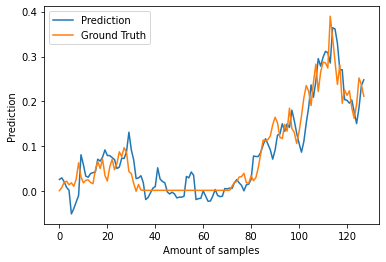

In [17]:
# %%
# Predicting
pred_y = grid_model.predict(test_X)
# %% Plotting
# plt.plot(range(len(train_y)), train_y, label='train_y')
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()
# %%

In [18]:
# prediction of feature
df_30_days_past=df.iloc[-7:,:]
df_30_days_past.tail()

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-21 22:45:00,4.5521,307.3230,6.1812,312.0492,7.6793,314.6835,8.4867,316.0503,8.6879,316.8657,8.7815,317.1689,27.90,1009.53,87.03,2.3584
2022-07-21 23:00:00,4.5931,308.9910,5.4076,312.4519,6.1518,314.8683,6.7197,316.4472,6.8998,317.2906,6.9864,317.6105,27.92,1010.14,0.00,2.8011
2022-07-21 23:15:00,3.3338,303.4994,4.6673,310.4815,5.9120,314.1776,6.7329,316.0832,6.9197,316.9911,7.0061,317.3137,27.44,1009.89,0.00,3.6597
2022-07-21 23:30:00,3.2299,299.8989,4.5556,308.4045,5.8027,312.7652,6.6115,314.9387,6.7961,315.8942,6.8890,316.2939,27.46,1009.84,0.00,3.4466
2022-07-21 23:45:00,3.4215,297.3140,4.7503,306.2668,6.0103,311.0873,6.7556,313.3806,6.9372,314.3576,7.0216,314.8269,27.46,1009.69,0.00,3.0725


In [19]:
df_30_days_future=pd.read_csv('.\\data\\FD001\\04 Fore_NWP_FD.csv',parse_dates=["Datetime"],index_col=[0])
df_30_days_future
df_30_days_future.shape

(672, 15)

In [20]:
df_30_days_future["Power(MW)"]=0

In [21]:
df_30_days_future

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-22 00:00:00,3.7211,295.8076,5.0066,304.4201,6.2332,309.2053,7.0688,311.6739,7.2327,312.6467,7.3154,313.1167,27.48,1009.94,91.75,0
2022-07-22 00:15:00,3.8066,293.5346,5.0170,301.8843,6.1681,306.6284,7.2085,309.6529,7.3615,310.5929,7.4355,311.0192,27.50,1010.59,91.66,0
2022-07-22 00:30:00,3.6731,294.9604,4.9233,302.9800,6.1044,307.5457,7.1653,310.3584,7.3207,311.1786,7.4027,311.5500,27.49,1010.61,91.58,0
2022-07-22 00:45:00,3.5422,297.2161,4.8605,305.0306,6.0974,309.2762,7.0755,311.7344,7.2339,312.4229,7.3028,312.7803,27.49,1010.30,91.49,0
2022-07-22 01:00:00,3.3743,298.6918,4.7401,306.5073,6.0209,310.6219,6.9490,312.7840,7.1021,313.4025,7.1718,313.7571,27.49,1010.12,91.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28 22:45:00,3.2940,53.2693,3.4840,49.7733,3.6509,46.9979,3.8255,44.6823,3.9843,42.6606,4.0584,41.7039,28.85,1004.59,85.20,0
2022-07-28 23:00:00,3.1397,55.9050,3.3223,52.3368,3.5110,49.5049,3.6723,47.0966,3.8396,45.1055,3.9178,44.1727,28.87,1004.80,85.14,0
2022-07-28 23:15:00,3.0180,57.3104,3.2122,53.7366,3.4047,50.8408,3.5776,48.5128,3.7421,46.6242,3.8258,45.7413,28.88,1004.96,85.25,0


In [22]:
df_30_days_future=df_30_days_future[["Speed10" , "Direction10" , "Speed30" , "Direction30" , "Speed50" , "Direction50" , "Speed70" , "Direction70" , "Speed90" , "Direction90" , "Speed100" , "Direction100" , "Temper" , "Pressure" , "Humidity" , "Power(MW)"]]

In [23]:
old_scaled_array=scaler.transform(df_30_days_past)

In [24]:
old_scaled_array.shape

(7, 16)

In [25]:
new_scaled_array=scaler.transform(df_30_days_future)

In [26]:
new_scaled_array.shape

(672, 16)

In [27]:

new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [28]:
full_df.shape

(679, 16)

In [29]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=7
for i in range(time_step,len(full_df_scaled_array)):
  data_x=[]
  data_x.append(
    full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
  data_x=np.array(data_x)
  prediction=grid_model.predict(data_x)
  all_data.append(prediction)
  full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


In [30]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,16, axis=-1)
y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),16)))[:,0]
print(y_pred_future_30_days)

[ 2.894974    1.0407741   0.43345824  0.20397544  0.15084541  0.20160656
  0.24690424  0.27321196  0.25713283  1.0660567   0.82577145  0.71162397
  0.62549084  0.11648206  0.15267932  0.19359024  0.20950766  0.18395822
  0.14417619  0.11437142  0.08058645  0.74695     0.70924026  0.5941795
  0.503507   -0.33166796 -0.37331077 -0.35916954 -0.35009804 -0.29987895
 -0.2439606  -0.1967981  -0.15522459  0.7375357   0.80251217  0.668545
  0.6098774   0.17111868  0.35667402  0.5344175   0.5298765   0.634318
  0.7337959   0.82698846  0.92573595  1.3344703   1.3754429   1.3616967
  1.3629411   1.3466738   1.4233112   1.422184    1.3507676   1.2965937
  1.283034    1.3030052   1.2981492   1.3526648   1.2124873   1.1364162
  1.1046894   1.5567954   1.6632692   1.5901188   1.458315    1.3968774
  1.3682446   1.3488599   1.3876122   1.1728452   1.2767708   1.2546724
  1.8561493   1.9857751   1.4251941   1.4500346   1.460671    1.439347
  1.404929    1.2702018   1.1066825   1.0773088   1.0594282   1

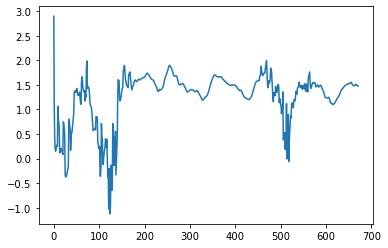

In [31]:
plt.plot(range(len(y_pred_future_30_days)), y_pred_future_30_days, label='Prediction')